In [ ]:
'''Florian Kenner, 4796728
Lorenz Krause, 1840200
Jonas Brichzin, 4808843'''

In [21]:
import numpy as np
import seaborn as sns

# Daten
import pandas as pd

# Visualisierung
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from pandas_profiling import ProfileReport
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz

# Machine Learning und Pre-Processing
from sklearn.datasets import fetch_california_housing
#from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.preprocessing import minmax_scale, MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor


import warnings; warnings.filterwarnings('ignore')
%matplotlib inline


In [22]:
db = pd.read_csv("nba_shotchartdetail_2018-19.csv")
db.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,21800001,7,203496,Robert Covington,1610612755,Philadelphia 76ers,1,11,40,...,Center(C),24+ ft.,26,-53,264,1,0,20181016,BOS,PHI
1,Shot Chart Detail,21800001,10,1628369,Jayson Tatum,1610612738,Boston Celtics,1,11,15,...,Left Side Center(LC),24+ ft.,25,-148,207,1,0,20181016,BOS,PHI
2,Shot Chart Detail,21800001,14,1627759,Jaylen Brown,1610612738,Boston Celtics,1,11,3,...,Center(C),Less Than 8 ft.,1,4,18,1,0,20181016,BOS,PHI
3,Shot Chart Detail,21800001,17,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,10,55,...,Center(C),Less Than 8 ft.,0,-8,3,1,1,20181016,BOS,PHI
4,Shot Chart Detail,21800001,19,1628369,Jayson Tatum,1610612738,Boston Celtics,1,10,36,...,Center(C),Less Than 8 ft.,4,-46,1,1,0,20181016,BOS,PHI


In [23]:
#Cleanup
db = db.drop(["GRID_TYPE", "GAME_EVENT_ID", "TEAM_ID", "SHOT_ATTEMPTED_FLAG"],1)
db.head()
np.where(db.applymap(lambda x: x == ''))
db.profile_report()

Summarize dataset:  81%|████████  | 25/31 [00:08<00:01,  3.04it/s, Calculate phi_k correlation]


KeyboardInterrupt: 

In [ ]:
def hit():   
    return db[db["SHOT_MADE_FLAG"] == "1"]

def actiontype(actiontype):
    return db[db["ACTION_TYPE"] == actiontype]

def hitrate(playername):
    a = db[db['PLAYER_NAME'] == playername]
    return a.groupby('PLAYER_NAME').SHOT_MADE_FLAG.mean()

In [ ]:
def hitrateShottype(playername, shottype):
    a = db[db['PLAYER_NAME'] == playername]
    b = a[db['SHOT_TYPE'] == shottype]
    return b.groupby('PLAYER_NAME').SHOT_MADE_FLAG.mean()

def hitrateShottype_Action(playername):
    a = db[db['PLAYER_NAME'] == playername]
    return a.groupby(['PLAYER_NAME', 'ACTION_TYPE','SHOT_TYPE']).SHOT_MADE_FLAG.mean()

def hitrateTeam(teamname):
    a = db[db['TEAM_NAME'] == teamname]
    return a.groupby('TEAM_NAME').SHOT_MADE_FLAG.mean()

def hitrateTeamShottype(teamname, shottype):
    a = db[db['TEAM_NAME'] == teamname]
    b = a[db['SHOT_TYPE'] == shottype]
    return b.groupby('TEAM_NAME').SHOT_MADE_FLAG.mean()

hitrateTeamShottype("Boston Celtics", "3PT Field Goal")

hitrateShottype_Action ("Jayson Tatum")



PLAYER_NAME   ACTION_TYPE                         SHOT_TYPE     
Jayson Tatum  Alley Oop Dunk Shot                 2PT Field Goal    0.750000
              Cutting Dunk Shot                   2PT Field Goal    0.900000
              Cutting Finger Roll Layup Shot      2PT Field Goal    0.600000
              Cutting Layup Shot                  2PT Field Goal    0.714286
              Driving Dunk Shot                   2PT Field Goal    0.947368
              Driving Finger Roll Layup Shot      2PT Field Goal    0.586957
              Driving Floating Bank Jump Shot     2PT Field Goal    0.666667
              Driving Floating Jump Shot          2PT Field Goal    0.351351
              Driving Hook Shot                   2PT Field Goal    0.333333
              Driving Layup Shot                  2PT Field Goal    0.369048
              Driving Reverse Layup Shot          2PT Field Goal    0.500000
              Dunk Shot                           2PT Field Goal    0.833333
           

<AxesSubplot:xlabel='Team Name', ylabel='Trefferrate'>

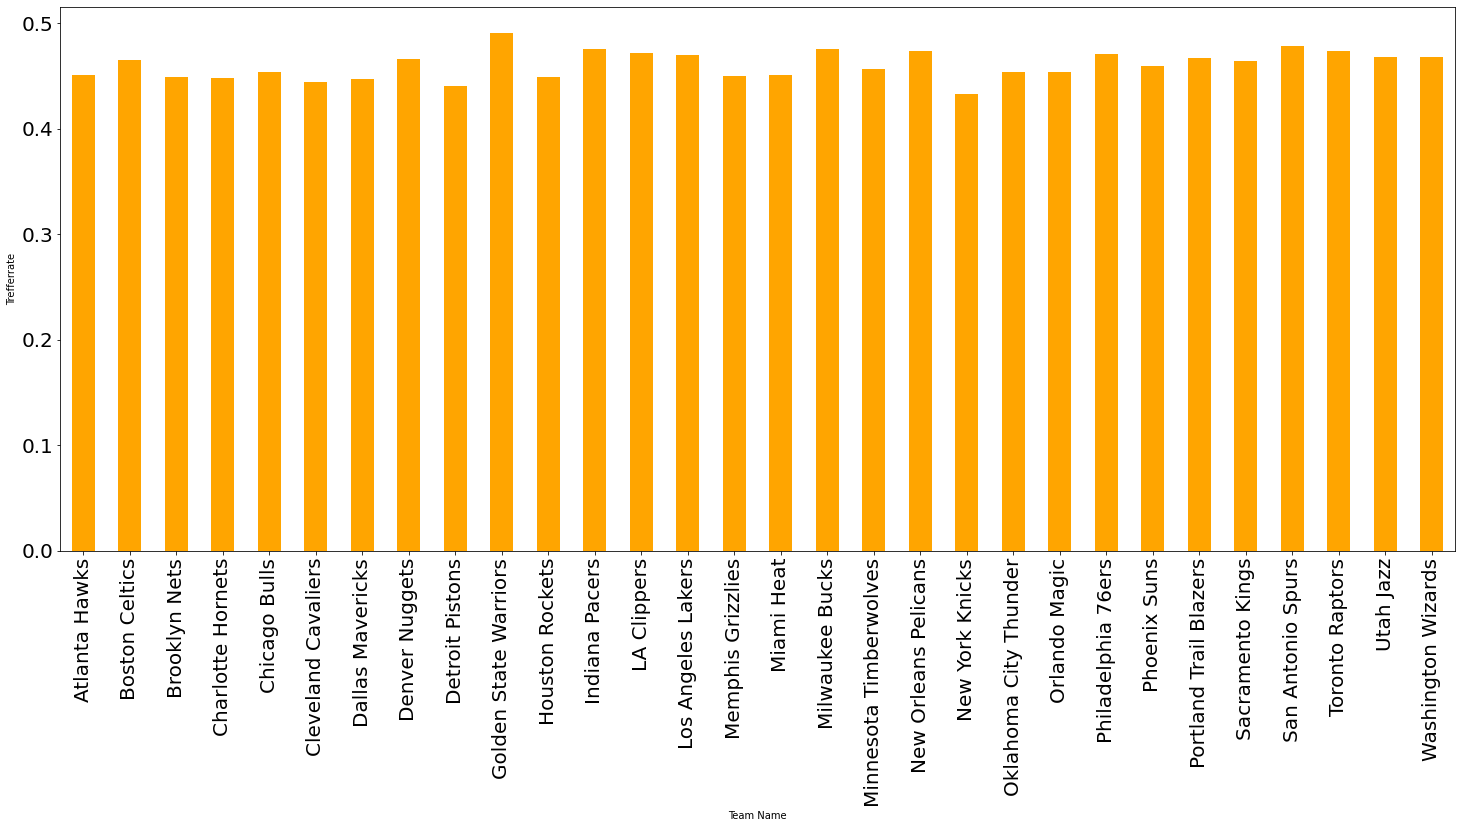

In [ ]:
def hitTeam():
    return db.groupby("TEAM_NAME"). SHOT_MADE_FLAG.mean()
(hitTeam()).plot(kind="bar", xlabel=("Team Name"), ylabel=("Trefferrate"), color="orange", figsize=(25, 10), fontsize=20)

<AxesSubplot:xlabel='Team Name', ylabel='Gesamttreffert'>

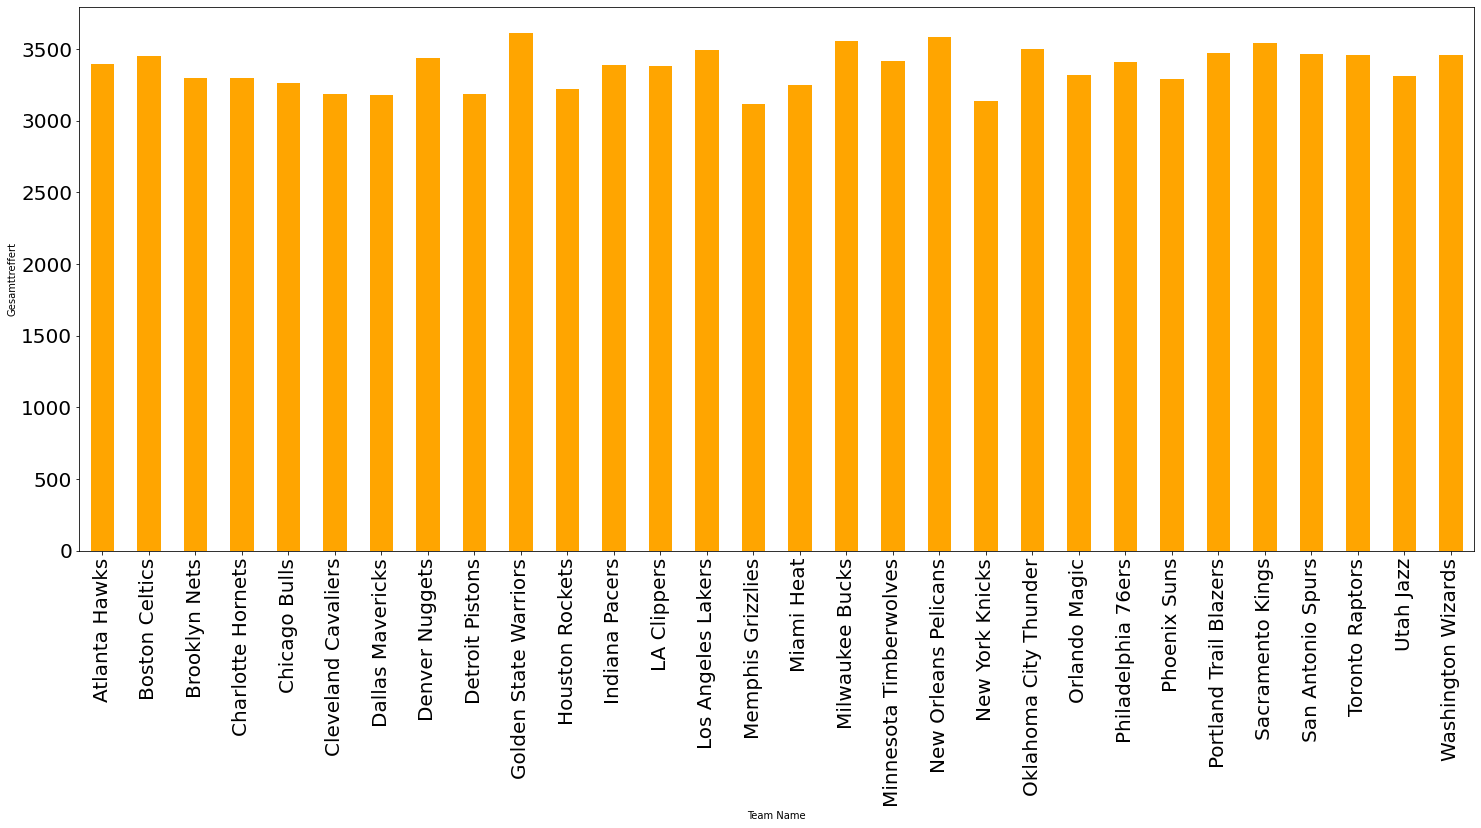

In [ ]:
def hitTeam():
    return db.groupby("TEAM_NAME"). SHOT_MADE_FLAG.sum()
(hitTeam()).plot(kind="bar", xlabel=("Team Name"), ylabel=("Gesamttreffert"), color="orange", figsize=(25, 10), fontsize=20)

In [ ]:
print("Man kann sehen, dass die New Orleans Pelicans eine gute Trefferrate haben und insgesamt auch viele Treffer haben. Dennoch sind sie nur Platz 13 von 15 geworden. Das kann damit zusammenhängen, dass sie schlecht verteidigt haben, was auch durch ihr Defensive von 113,10 bestättigt wird (eins der schlechtesten der Liga).")

Man kann sehen, dass die New Orleans Pelicans eine gute Trefferrate haben und insgesamt auch viele Treffer haben. Dennoch sind sie nur Platz 13 von 15 geworden. Das kann damit zusammenhängen, dass sie schlecht verteidigt haben, was auch durch ihr Defensive von 113,10 bestättigt wird (eins der schlechtesten der Liga).


In [ ]:

#Enrichment
def hitratebytime():
    a=(db["PERIOD"]*12)-db["MINUTES_REMAINING"]
    db.insert(7,"GAME_MINUTES_PLAYED", a)
    db1 = db[db['PERIOD'] <= 4]
    db2 = db[db['PERIOD'] > 4]
    b = (db2["PERIOD"]-4) * 5 - db2['MINUTES_REMAINING'] + 48
    db2 = db2.drop(['GAME_MINUTES_PLAYED'], 1)
    db2.insert(7,"GAME_MINUTES_PLAYED", b)
    dball = db1.append(db2)
    return dball.groupby("GAME_MINUTES_PLAYED").SHOT_MADE_FLAG.mean()


def hitratebytime_player(playername, time = 100):
    a=(db["PERIOD"]*12)-db["MINUTES_REMAINING"]
    db.insert(7,"GAME_MINUTES_PLAYED", a)
    db1 = db[db['PERIOD'] <= 4]
    db2 = db[db['PERIOD'] > 4]
    b = (db2["PERIOD"]-4) * 5 - db2['MINUTES_REMAINING'] + 48
    db2 = db2.drop(['GAME_MINUTES_PLAYED'], 1)
    db2.insert(7,"GAME_MINUTES_PLAYED", b)
    dball = db1.append(db2)
    dball = dball[dball['PLAYER_NAME'] == playername]
    if time != 100:
        dball = dball[dball['GAME_MINUTES_PLAYED'] == time]
    return dball.groupby("GAME_MINUTES_PLAYED").SHOT_MADE_FLAG.mean()


def hitratebytime_team(teamname, time = 100):
    a=(db["PERIOD"]*12)-db["MINUTES_REMAINING"]
    db.insert(7,"GAME_MINUTES_PLAYED", a)
    db1 = db[db['PERIOD'] <= 4]
    db2 = db[db['PERIOD'] > 4]
    b = (db2["PERIOD"]-4) * 5 - db2['MINUTES_REMAINING'] + 48
    db2 = db2.drop(['GAME_MINUTES_PLAYED'], 1)
    db2.insert(7,"GAME_MINUTES_PLAYED", b)
    dball = db1.append(db2)
    dball = dball[dball['TEAM_NAME'] == teamname]
    if time != 100:
        dball = dball[dball['GAME_MINUTES_PLAYED'] == time]
    return dball.groupby("GAME_MINUTES_PLAYED").SHOT_MADE_FLAG.mean()


def hitratebygame_team(teamname):
    a = db[db["TEAM_NAME"] == teamname]
    return a.groupby(['GAME_ID','HTM', 'VTM']).SHOT_MADE_FLAG.mean()

In [ ]:
def stars():
    db = pd.read_csv("nba_shotchartdetail_2018-19.csv")
    db = db.groupby('PLAYER_NAME').SHOT_MADE_FLAG.sum()
    db = db.sort_values(ascending = False)
    return db[:40]



def starsmean():
    db = pd.read_csv("nba_shotchartdetail_2018-19.csv")
    array = ["James Harden","Bradley Beal", "Kemba Walker","Giannis Antetokounmpo","Kevin Durant","Paul George", "Nikola Vucevic", "LaMarcus Aldridge", "Karl-Anthony Towns", "Damian Lillard","Donovan Mitchell","D'Angelo Russell", "Klay Thompson", "Stephen Curry", "DeMar DeRozan", "Russell Westbrook", "Buddy Hield", "Blake Griffin", "Nikola Jokic", "Tobias Harris", "Kyrie Irving ", "Devin Booker ", "Joel Embiid", "Julius Randle", "CJ McCollum", "Andre Drummond", "Kawhi Leonard", "LeBron James", "Jrue Holiday", "Montrezl Harrell", "Ben Simmons", "Anthony Davis", "Zach LaVine", "Jordan Clarkson", "Trae Young", "Bojan Bogdanovic", "Collin Sexton", "Pascal Siakam", "Jamal Murray", "Deandre Ayton"]
    a=(db["PERIOD"]*12)-db["MINUTES_REMAINING"]
    db.insert(7,"GAME_MINUTES_PLAYED", a)
    db1 = db[db['PERIOD'] <= 4]
    db2 = db[db['PERIOD'] > 4]
    b = (db2["PERIOD"]-4) * 5 - db2['MINUTES_REMAINING'] + 48
    db2 = db2.drop(['GAME_MINUTES_PLAYED'], 1)
    db2.insert(7,"GAME_MINUTES_PLAYED", b)
    dballll = db1.append(db2)
    c = dballll.loc[db['PLAYER_NAME'].isin(array)]
    return c.groupby("GAME_MINUTES_PLAYED").SHOT_MADE_FLAG.mean()

<AxesSubplot:xlabel='GAME_MINUTES_PLAYED'>

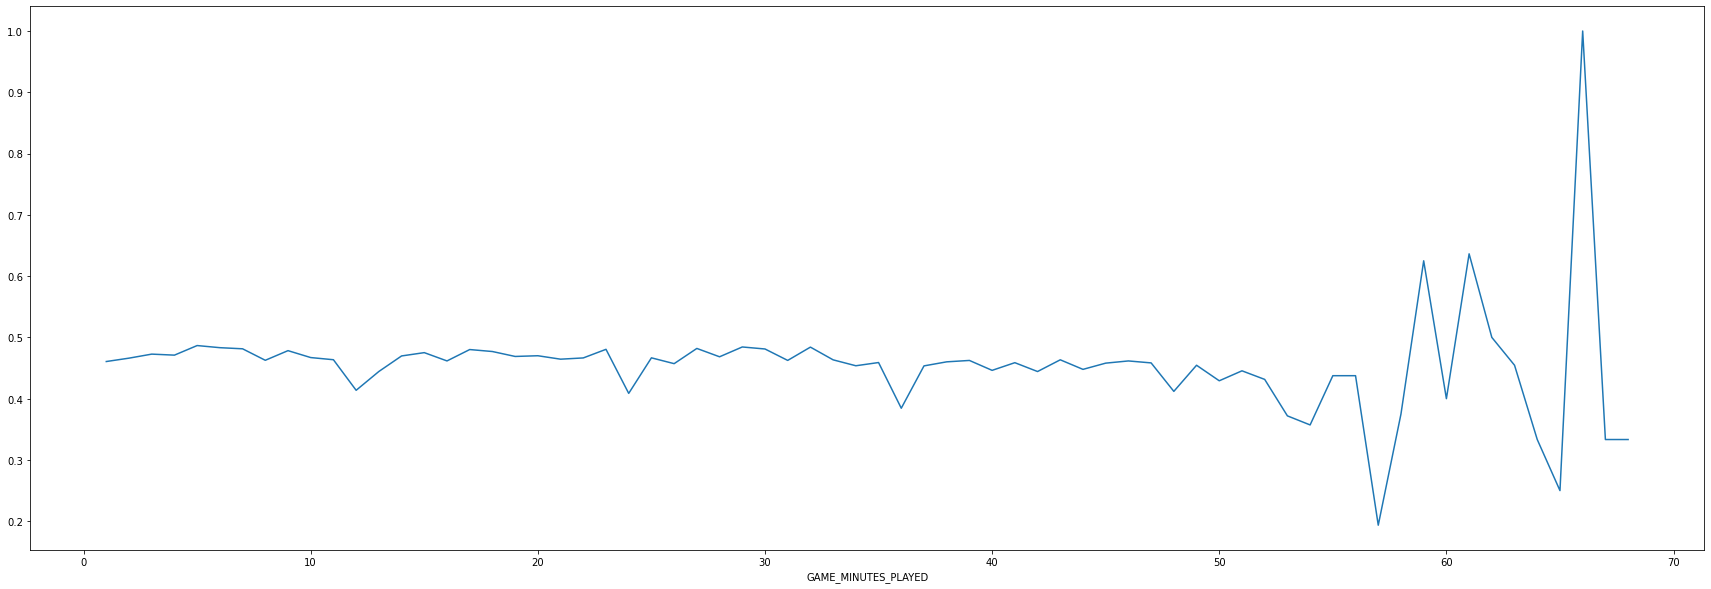

In [ ]:
hitratebytime().plot(figsize=(30,10))

<AxesSubplot:xlabel='GAME_MINUTES_PLAYED'>

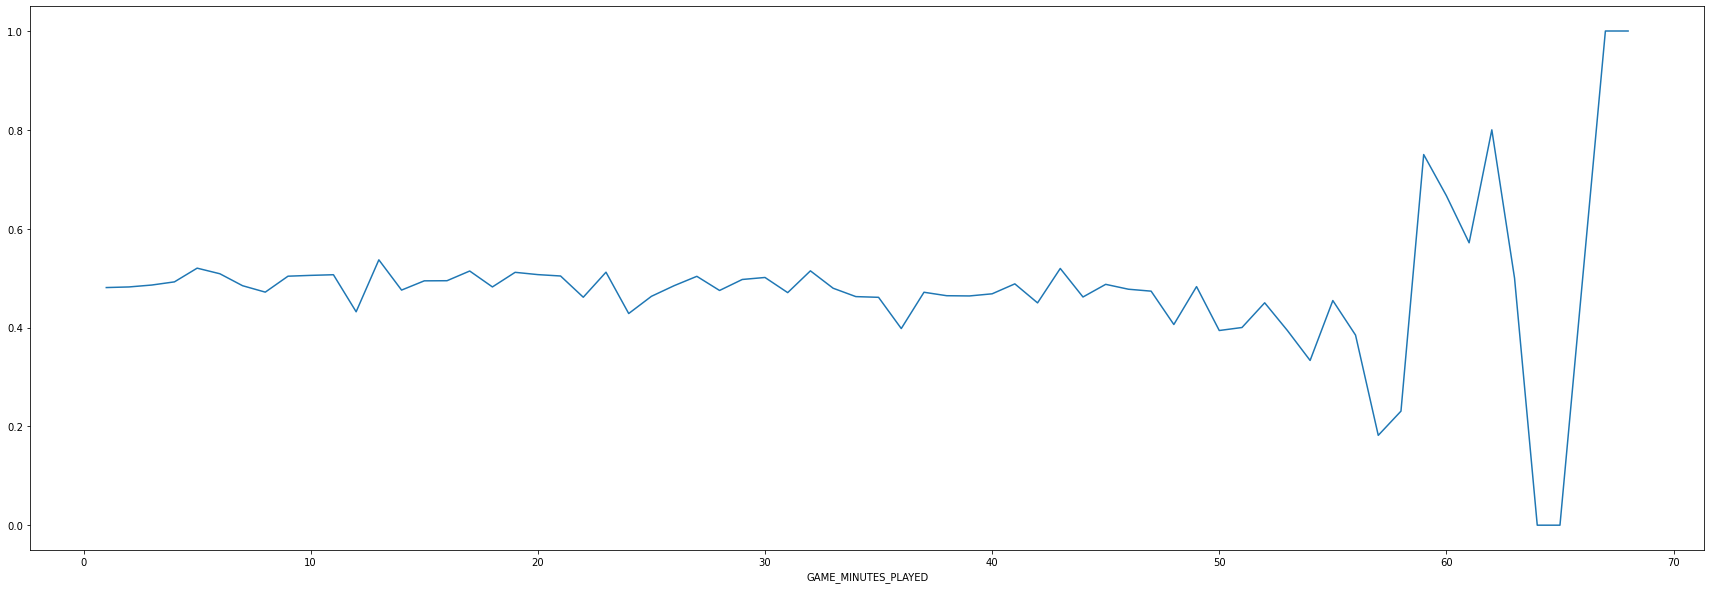

In [ ]:
starsmean().plot(figsize=(30,10))

In [ ]:
def hitratebygameHome():
    return db.groupby(['GAME_ID','HTM']).SHOT_MADE_FLAG.mean()

def hitratebygameAway():
    return db.groupby(['GAME_ID','VTM']).SHOT_MADE_FLAG.mean()

def hitratebyhomegame_team(team = "ab"):
    a = db
    if team != "ab":    
        a = db[db["HTM"] == team]
    return a.groupby(['GAME_ID','HTM', 'VTM']).SHOT_MADE_FLAG.mean()

def hitratebyawaygame_team(team = "ab"):
    a = db
    if team != "ab":
        a = db[db["VTM"] == team]
    return a.groupby(['GAME_ID','HTM', 'VTM']).SHOT_MADE_FLAG.mean()


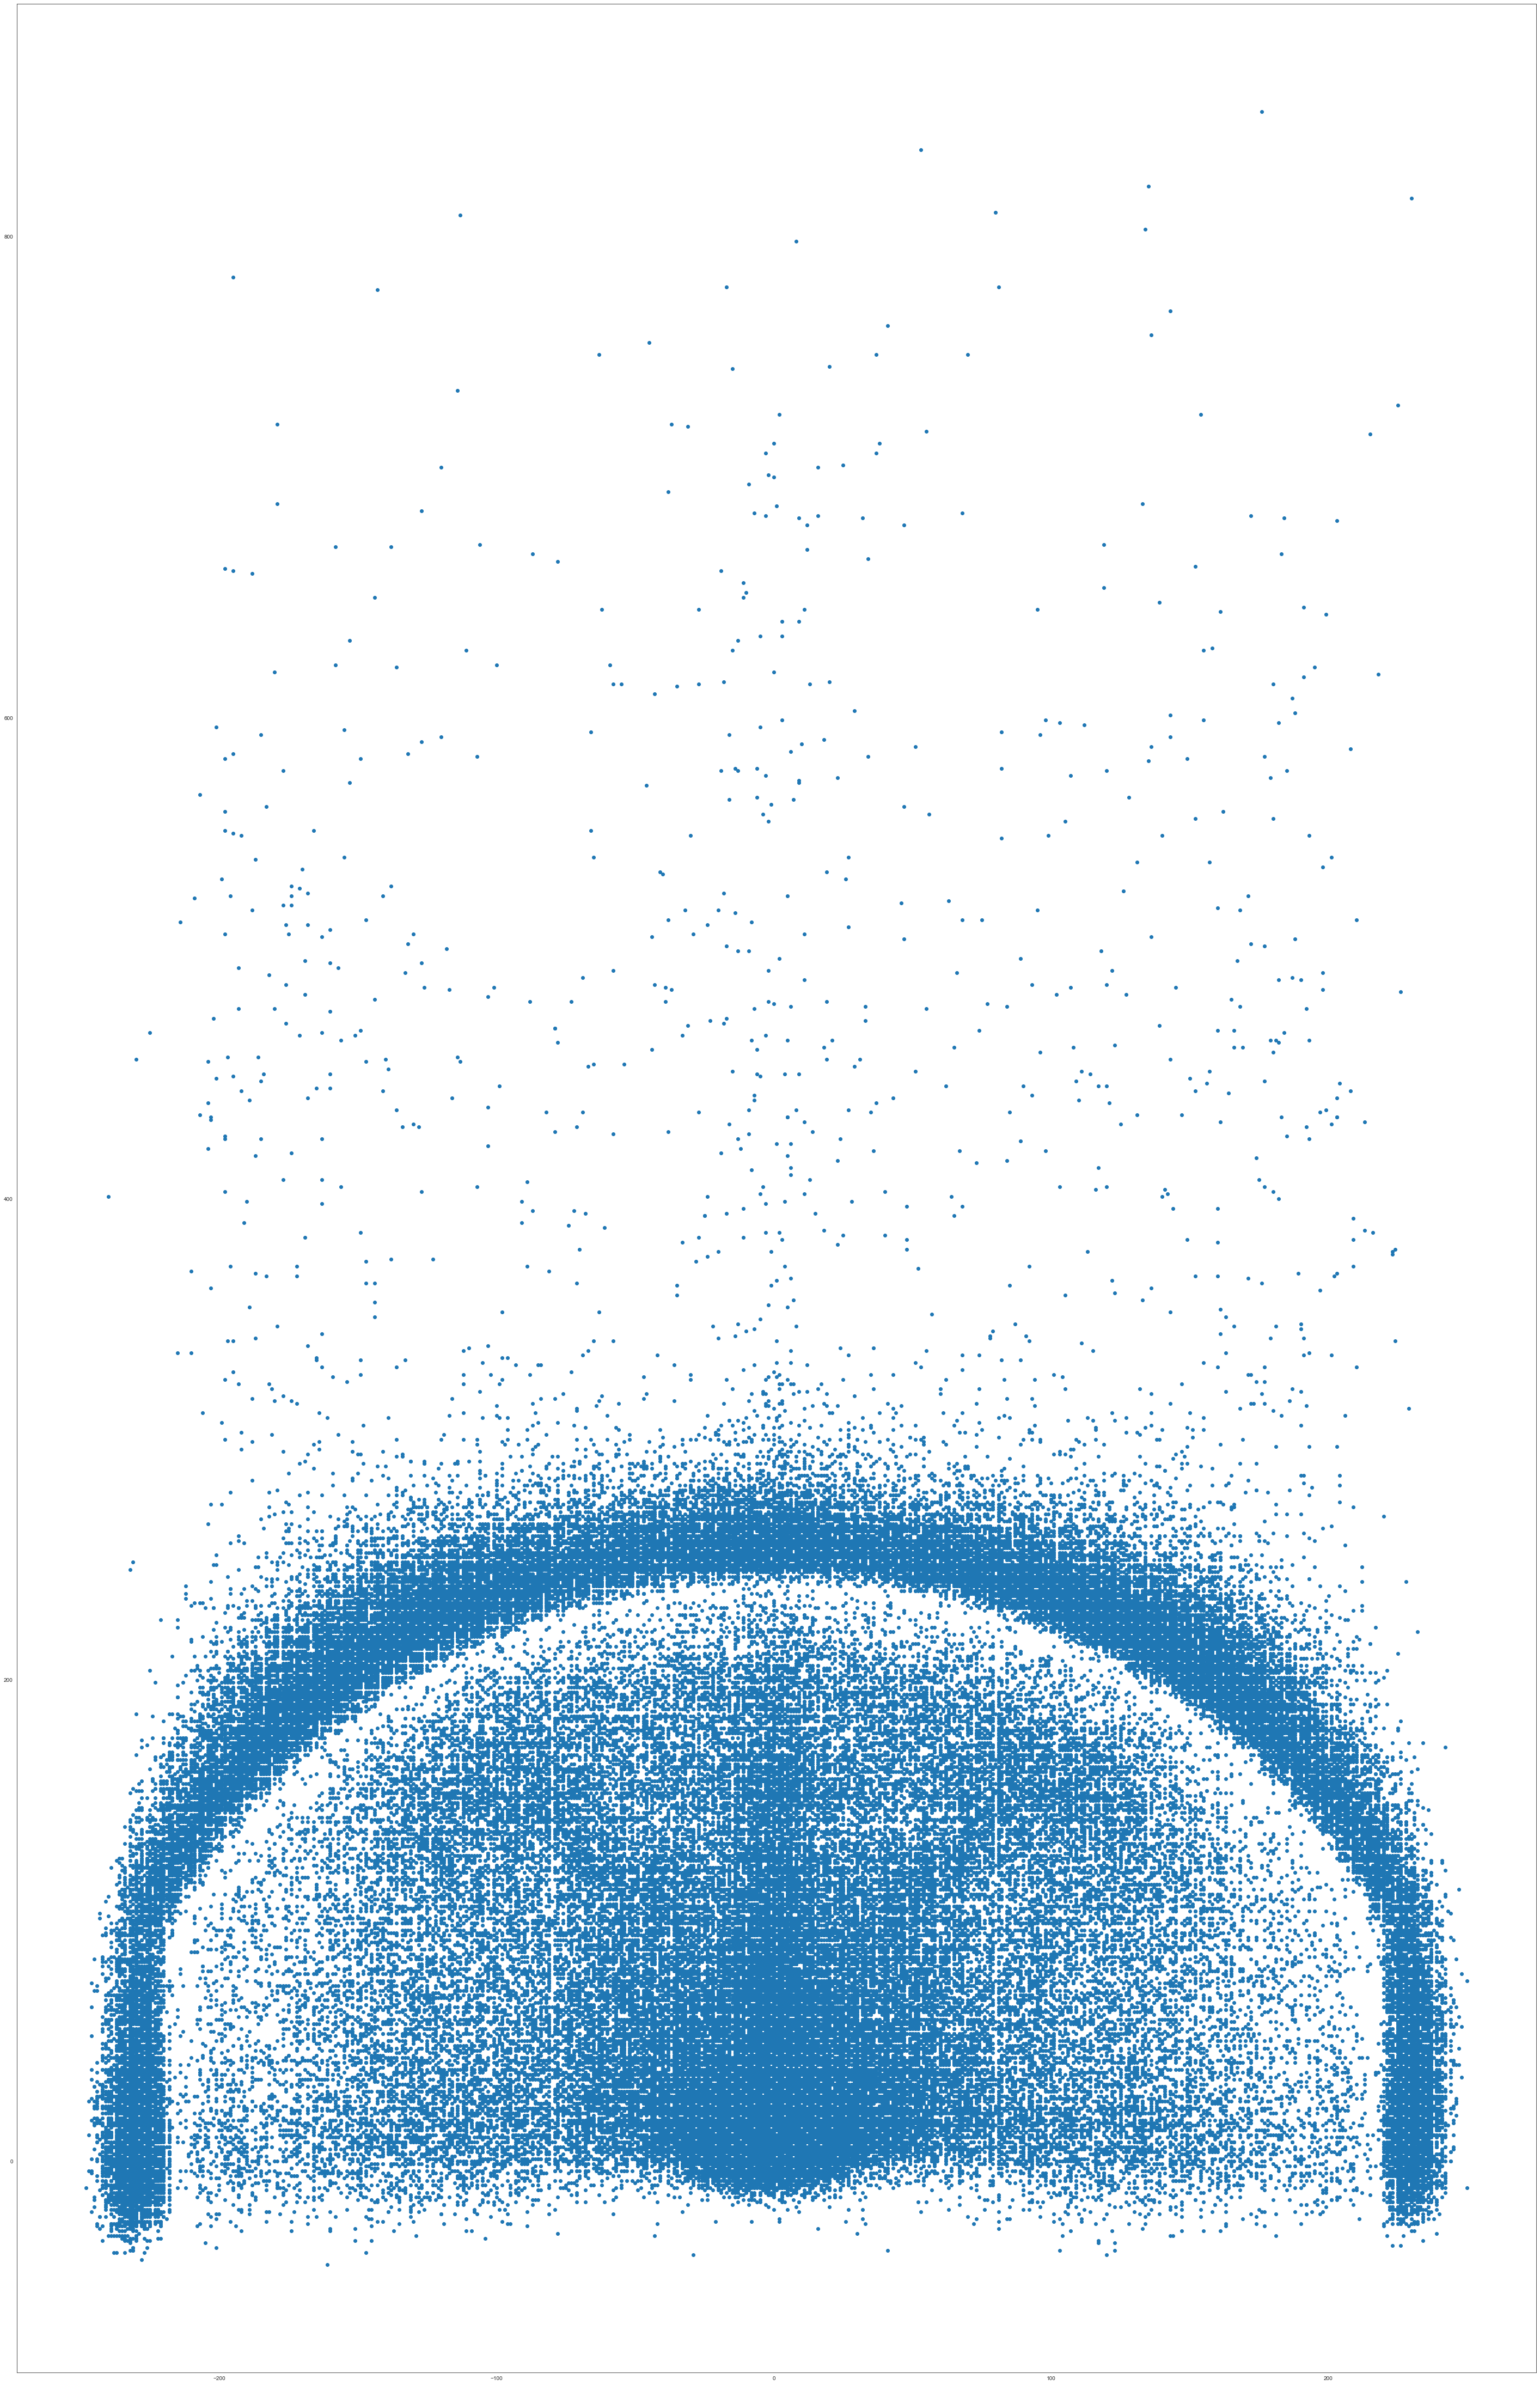

In [ ]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(50,80))
plt.scatter(db.LOC_X, db.LOC_Y)
plt.show()

In [ ]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

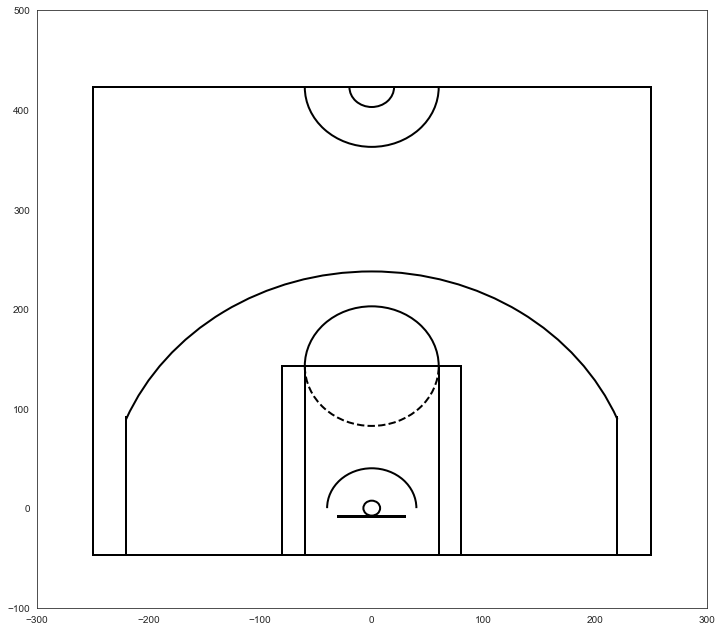

In [ ]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

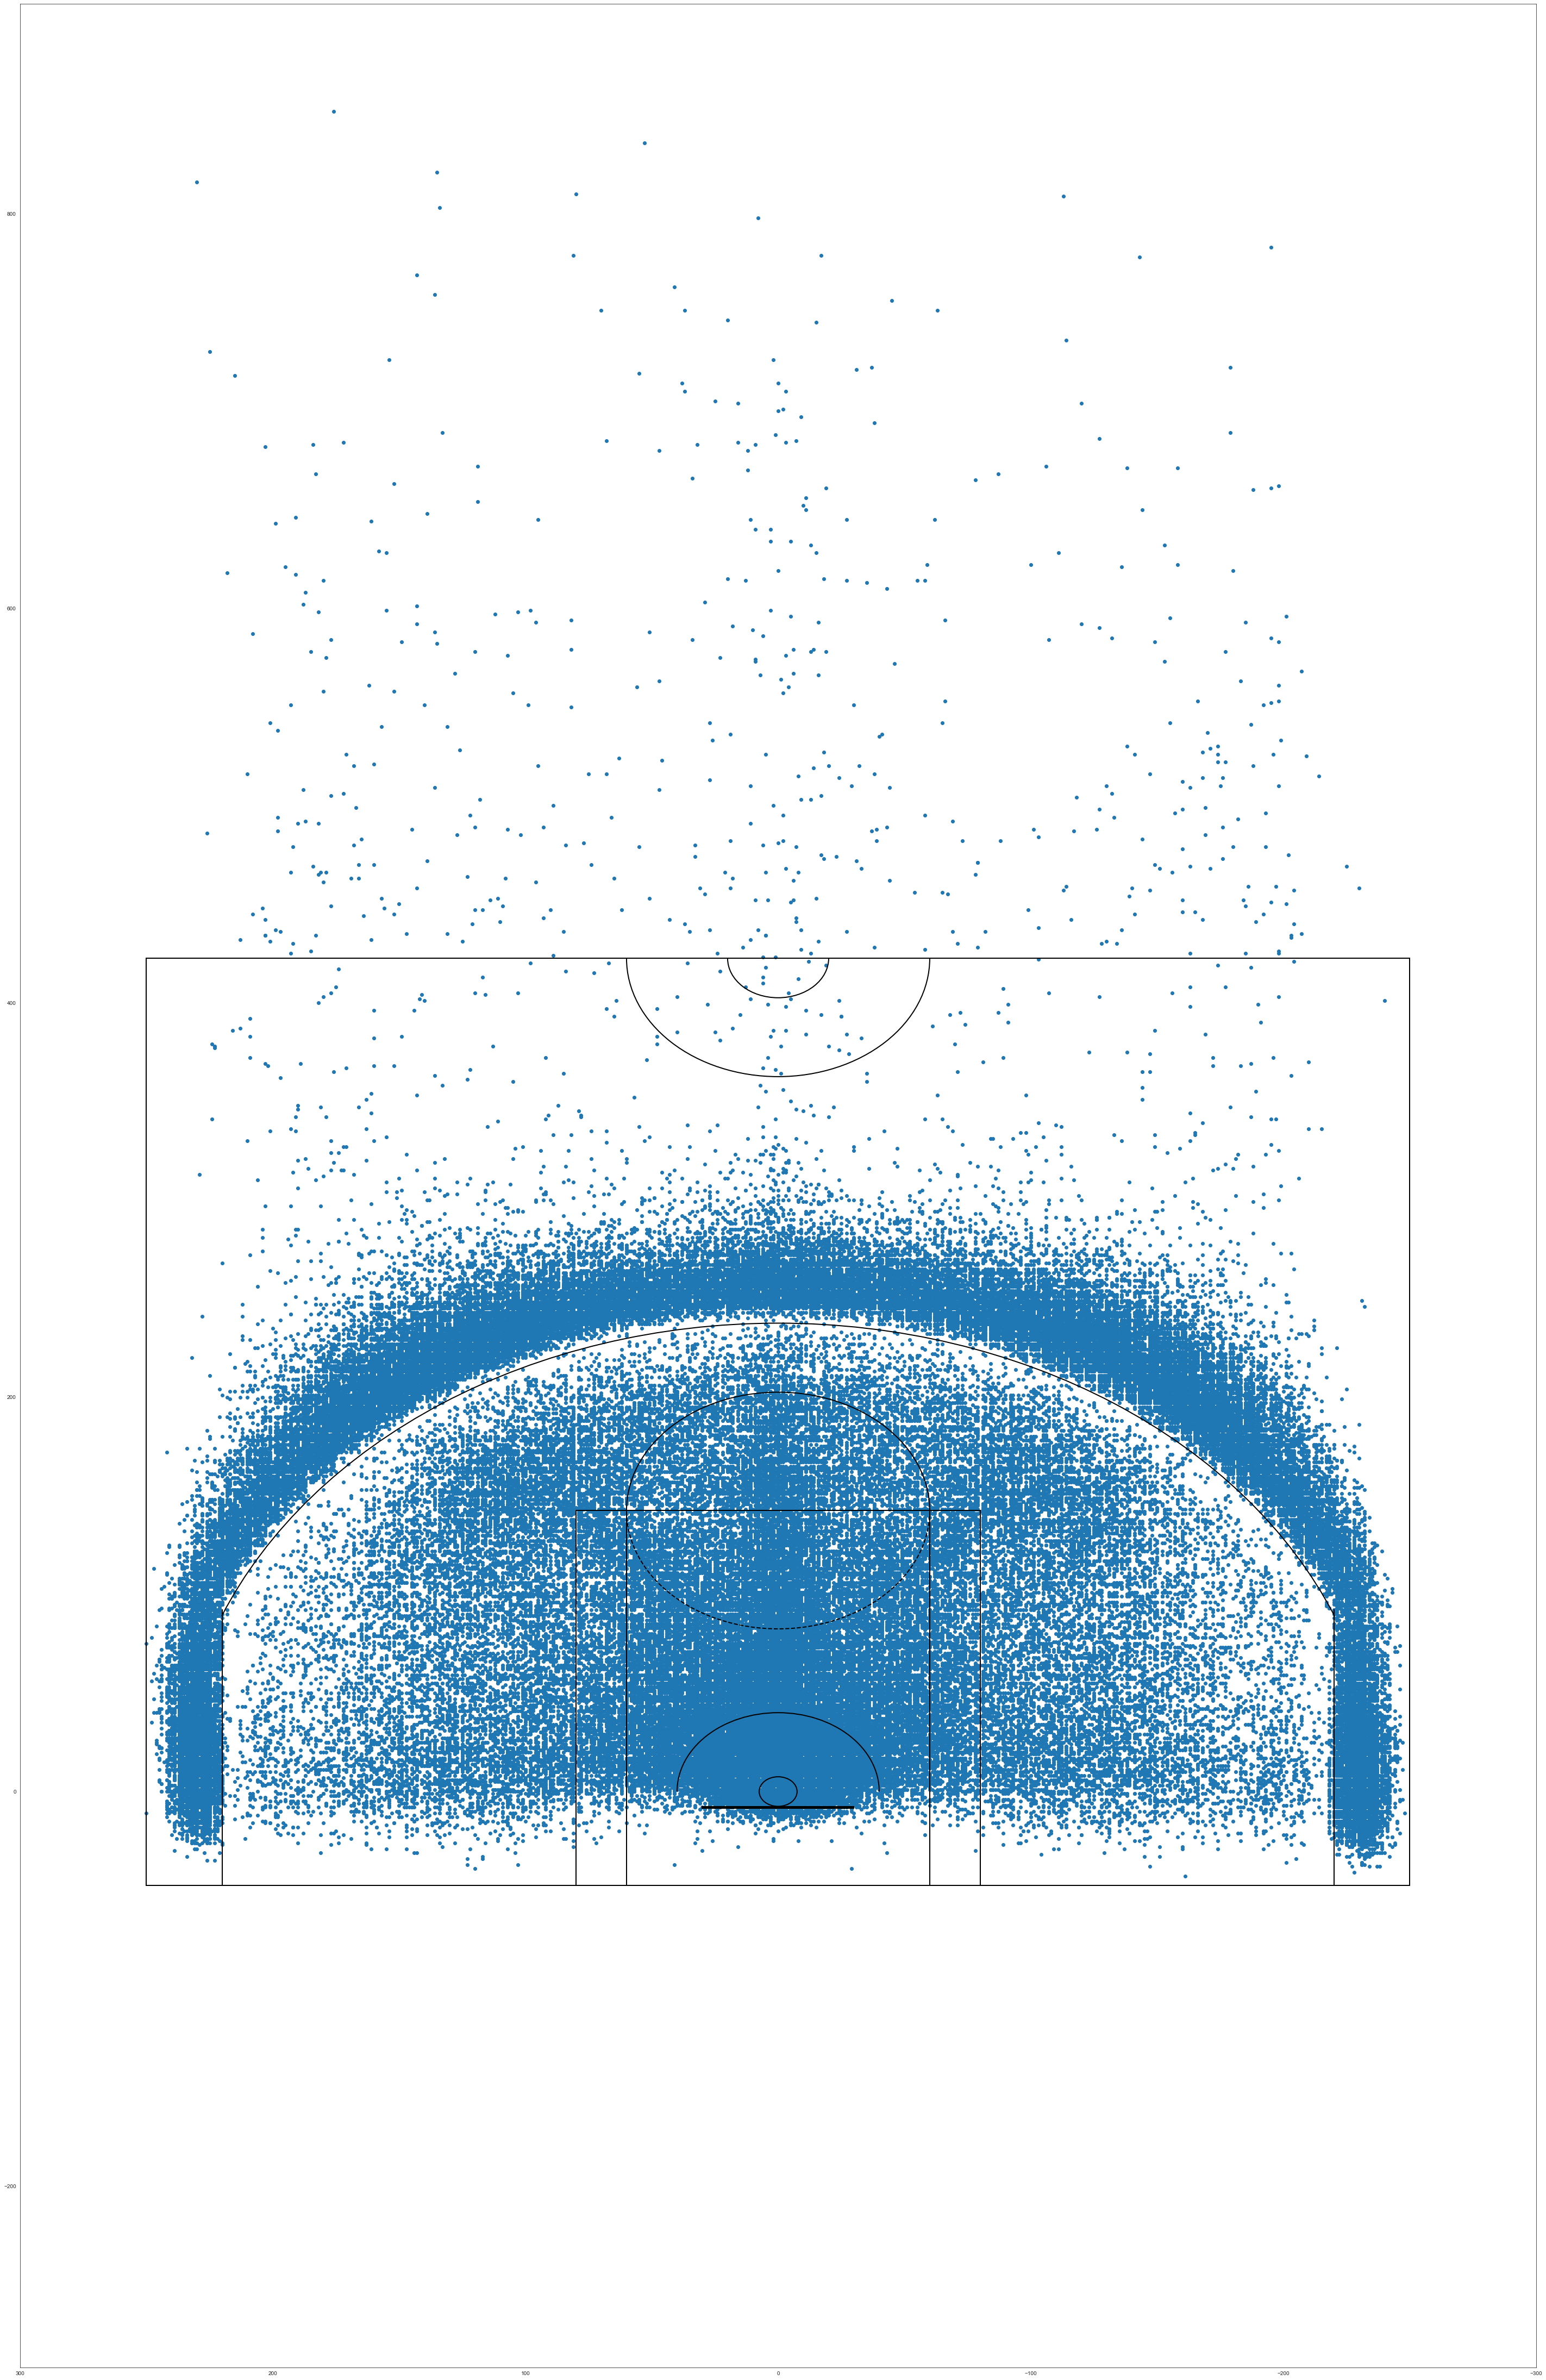

In [ ]:
plt.figure(figsize=(50,80))
plt.scatter(db.LOC_X, db.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

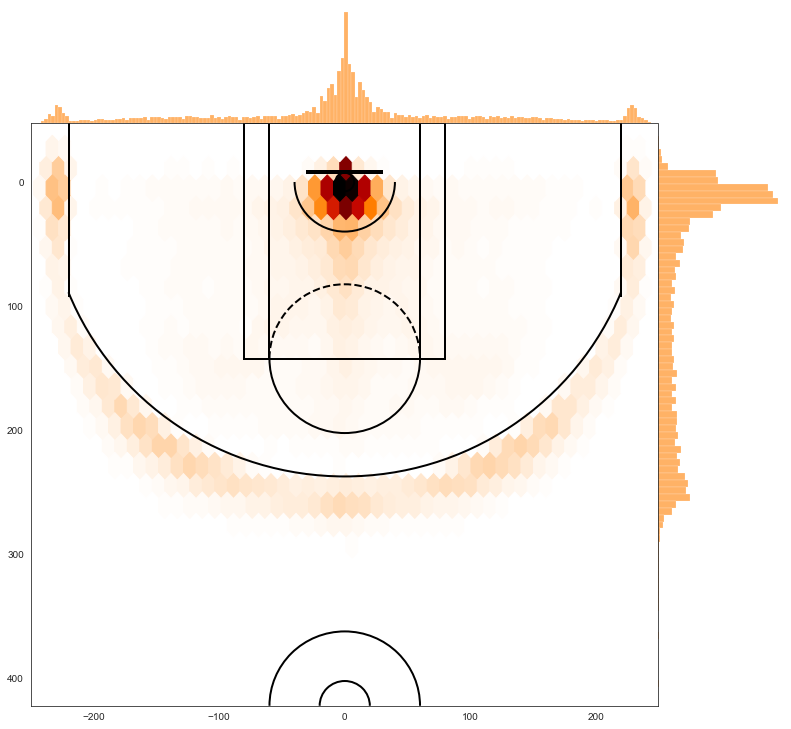

In [ ]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(db.LOC_X, db.LOC_Y,
                                 kind='hex', space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

plt.show()
